In [52]:
%pip install scikit-learn==1.6.0
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: C:\Users\sapta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
df = pd.read_csv("yield_df.csv")
df['Area'] = df['Area'].str.lower()
df['Item'] = df['Item'].str.lower()

In [54]:
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,albania,maize,1990,36613,1485.0,121.0,16.37
1,1,albania,potatoes,1990,66667,1485.0,121.0,16.37
2,2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,albania,sorghum,1990,12500,1485.0,121.0,16.37
4,4,albania,soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')

In [56]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,albania,maize,1990,36613,1485.0,121.0,16.37
1,albania,potatoes,1990,66667,1485.0,121.0,16.37
2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37
3,albania,sorghum,1990,12500,1485.0,121.0,16.37
4,albania,soybeans,1990,7000,1485.0,121.0,16.37


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [58]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [59]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace=True)

In [61]:

df.duplicated().sum()

0

In [62]:
df.shape

(25932, 7)

In [63]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [64]:
df.select_dtypes(include=[np.number]).corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [65]:
len(df['Area'].unique())

101

In [66]:
len(df['Item'].unique())

10

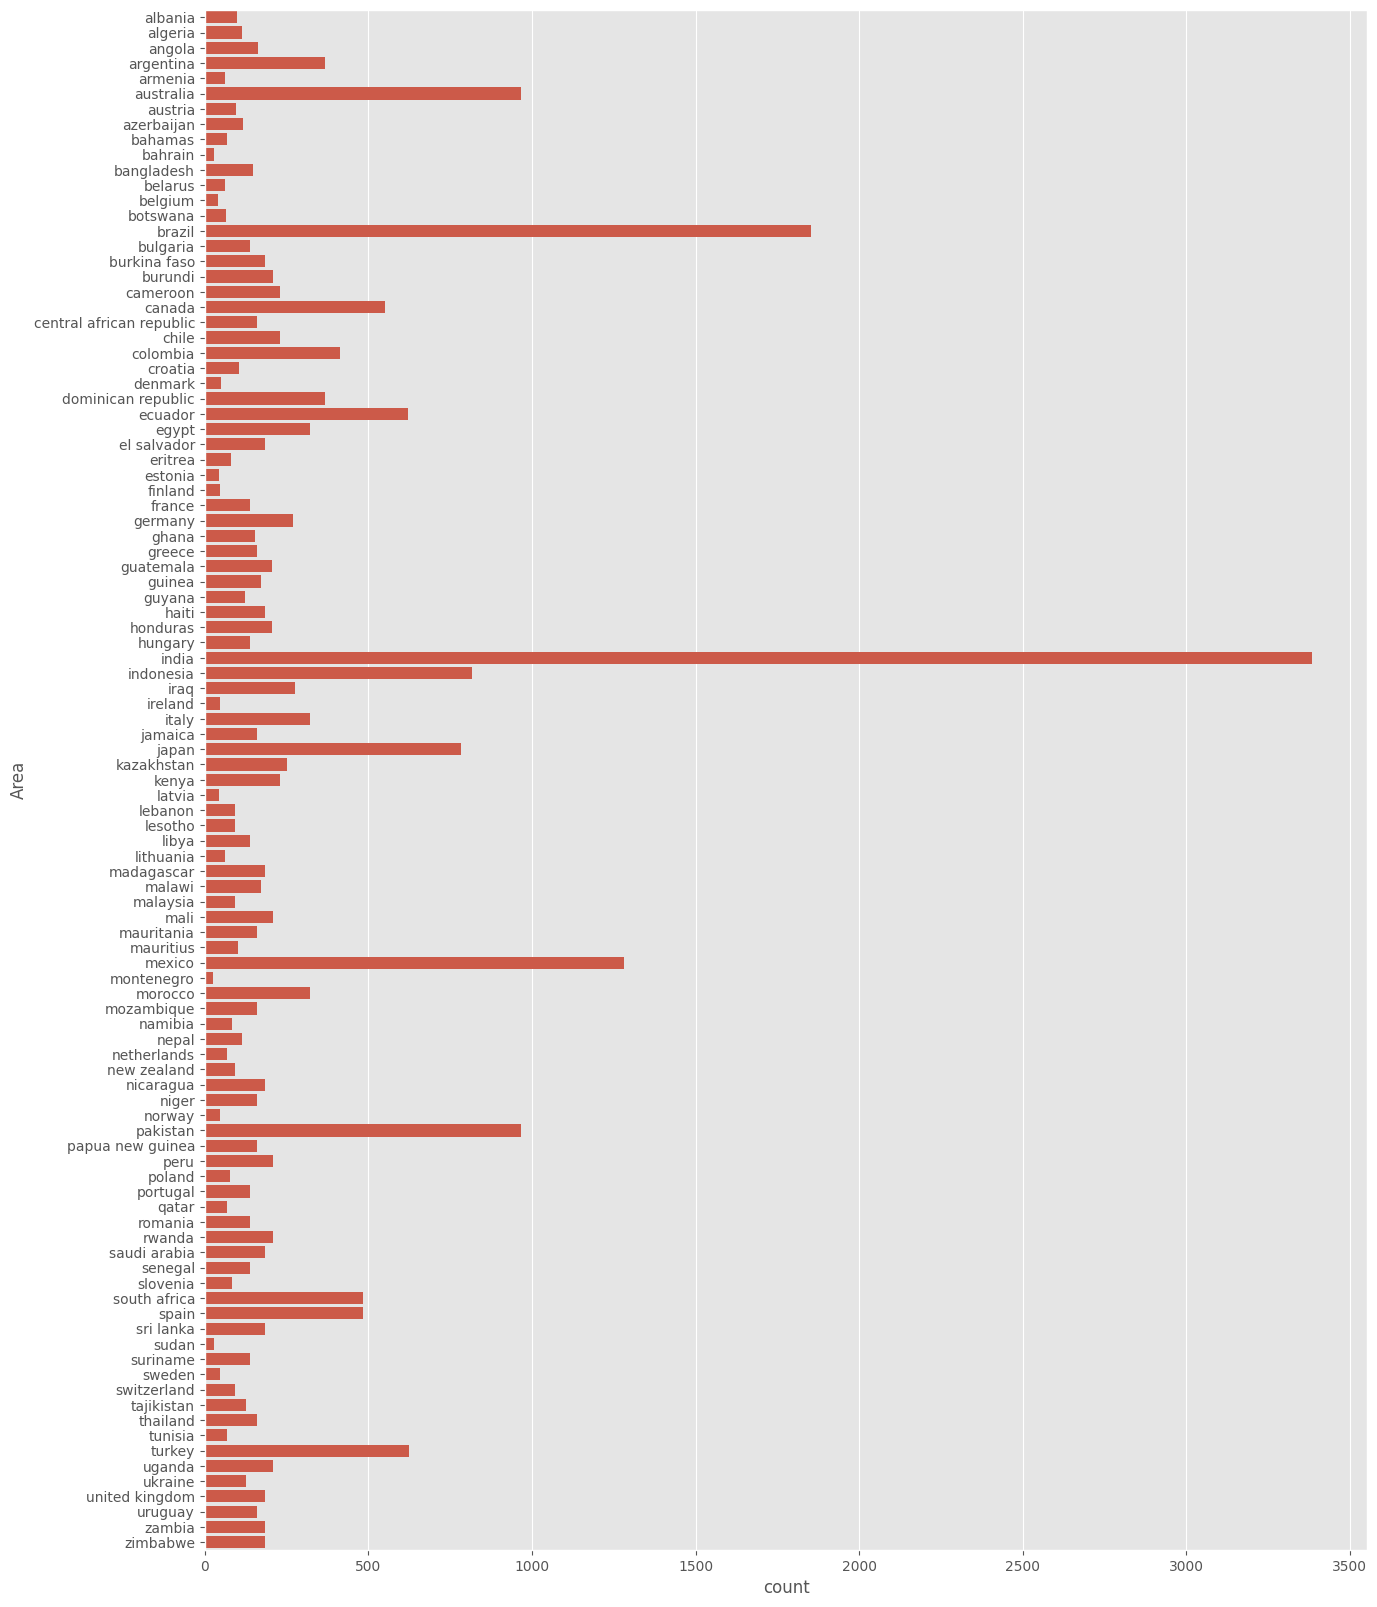

In [67]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

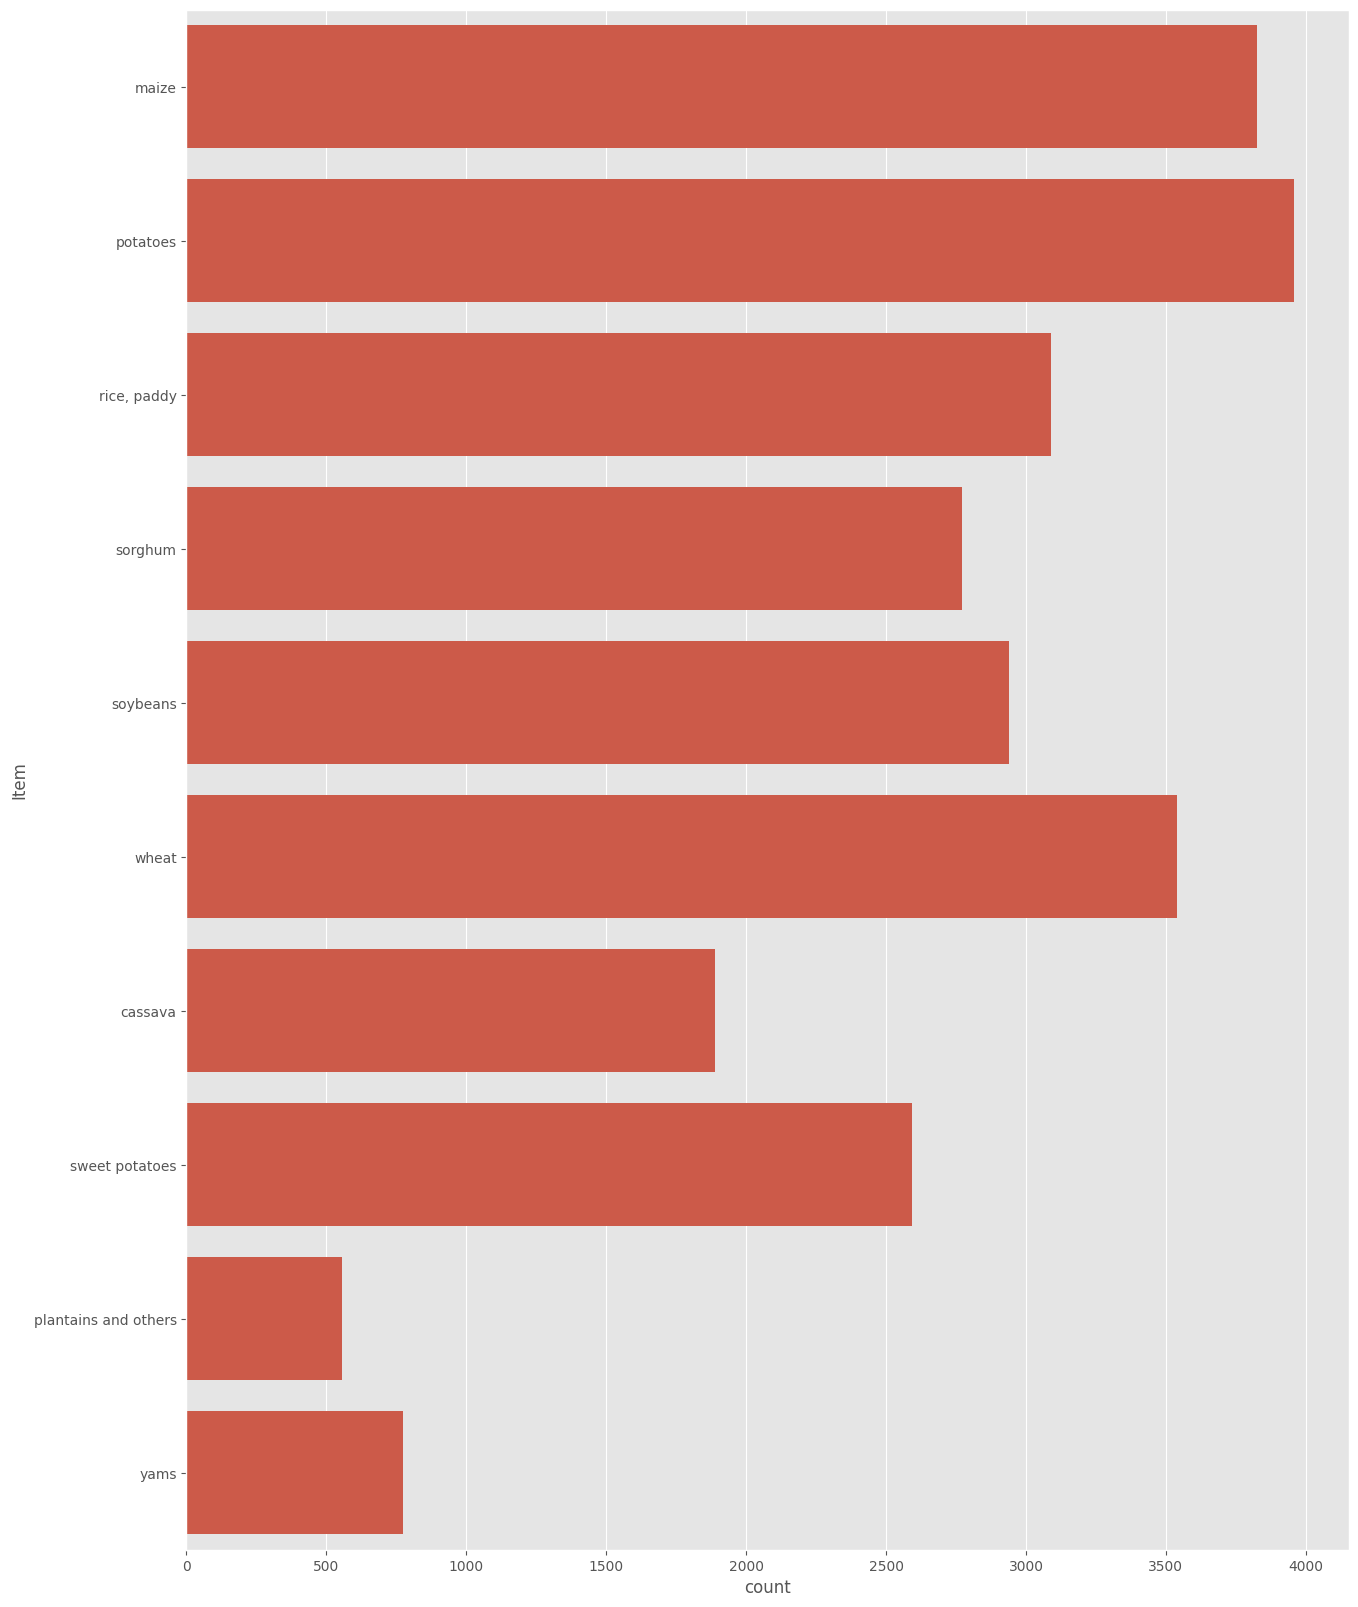

In [68]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [69]:
(df['Area'].value_counts() <400).sum()

88

In [ ]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [71]:
df['hg/ha_yield'].sum()

1996196943

In [72]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

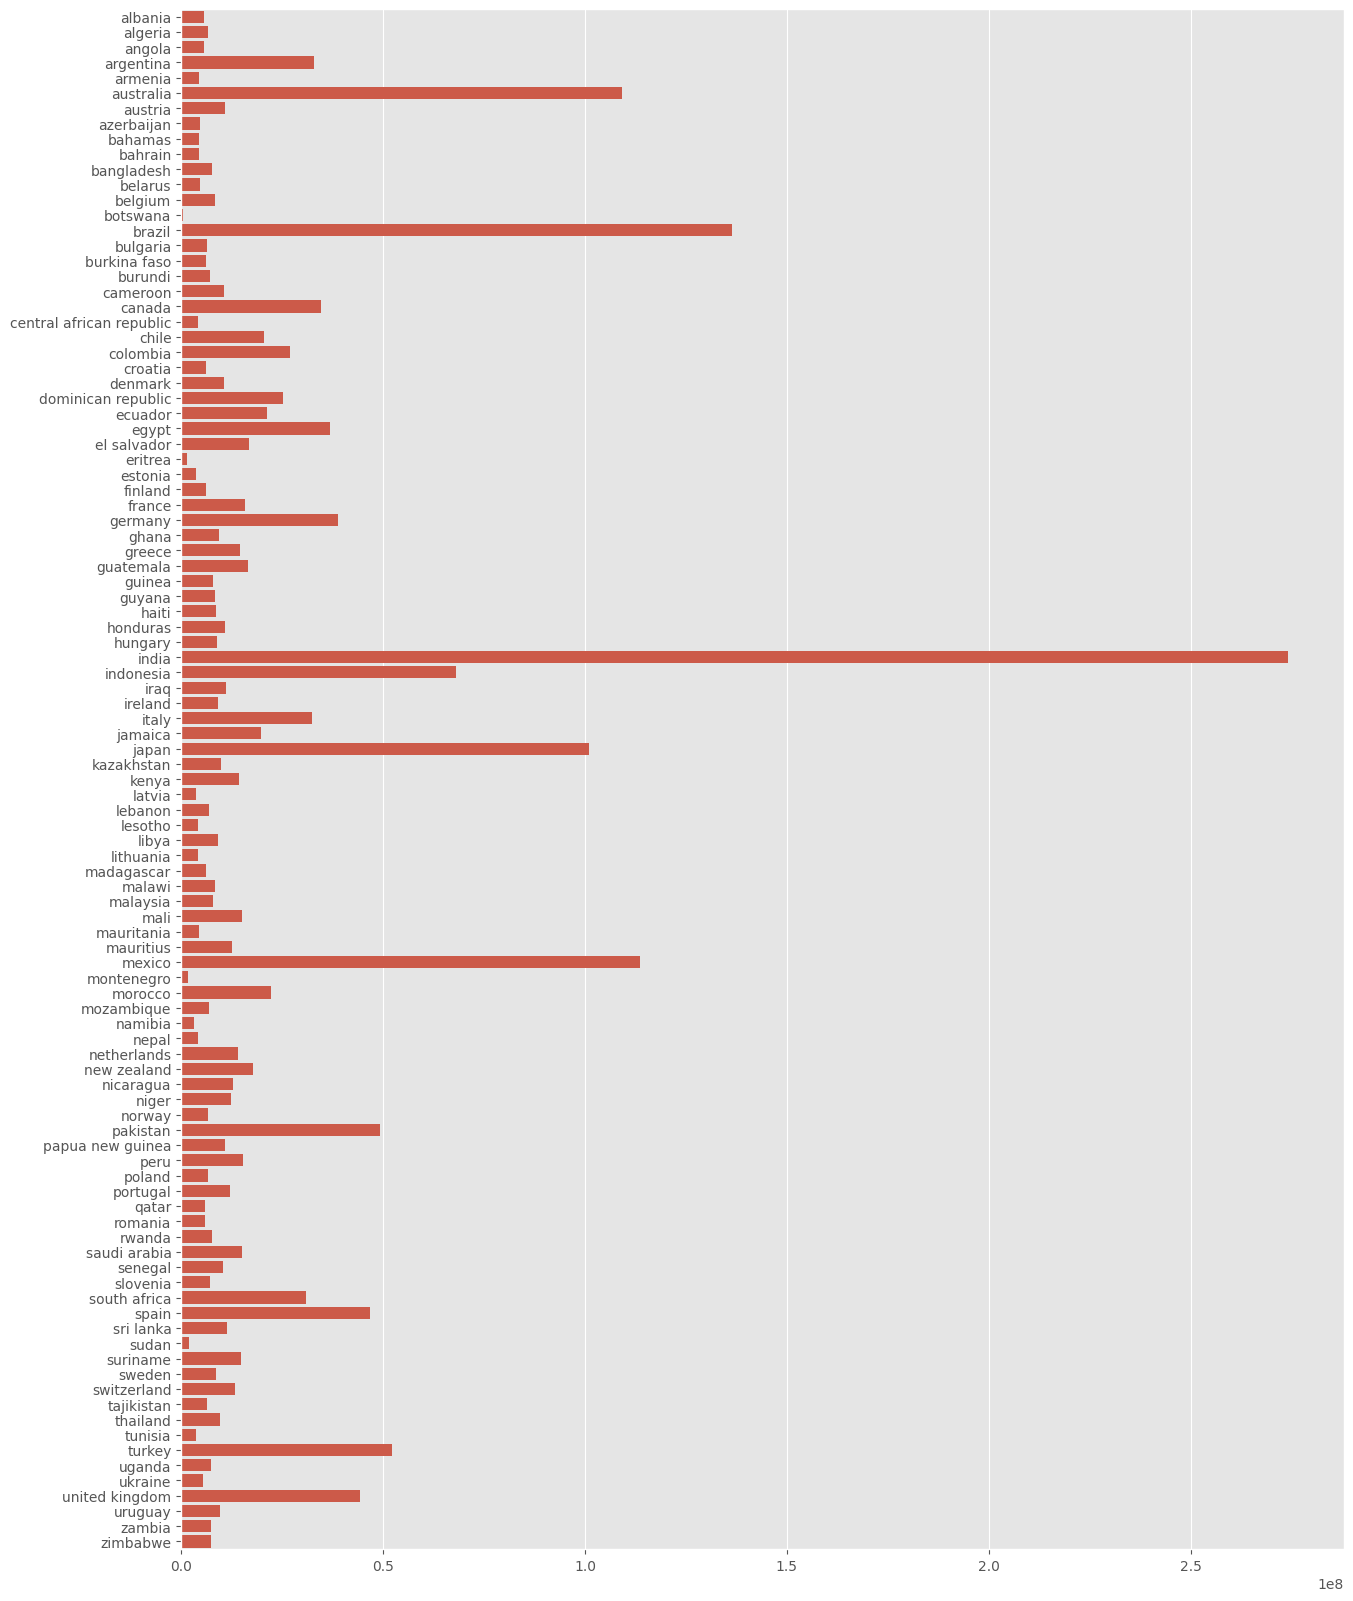

In [73]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [ ]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

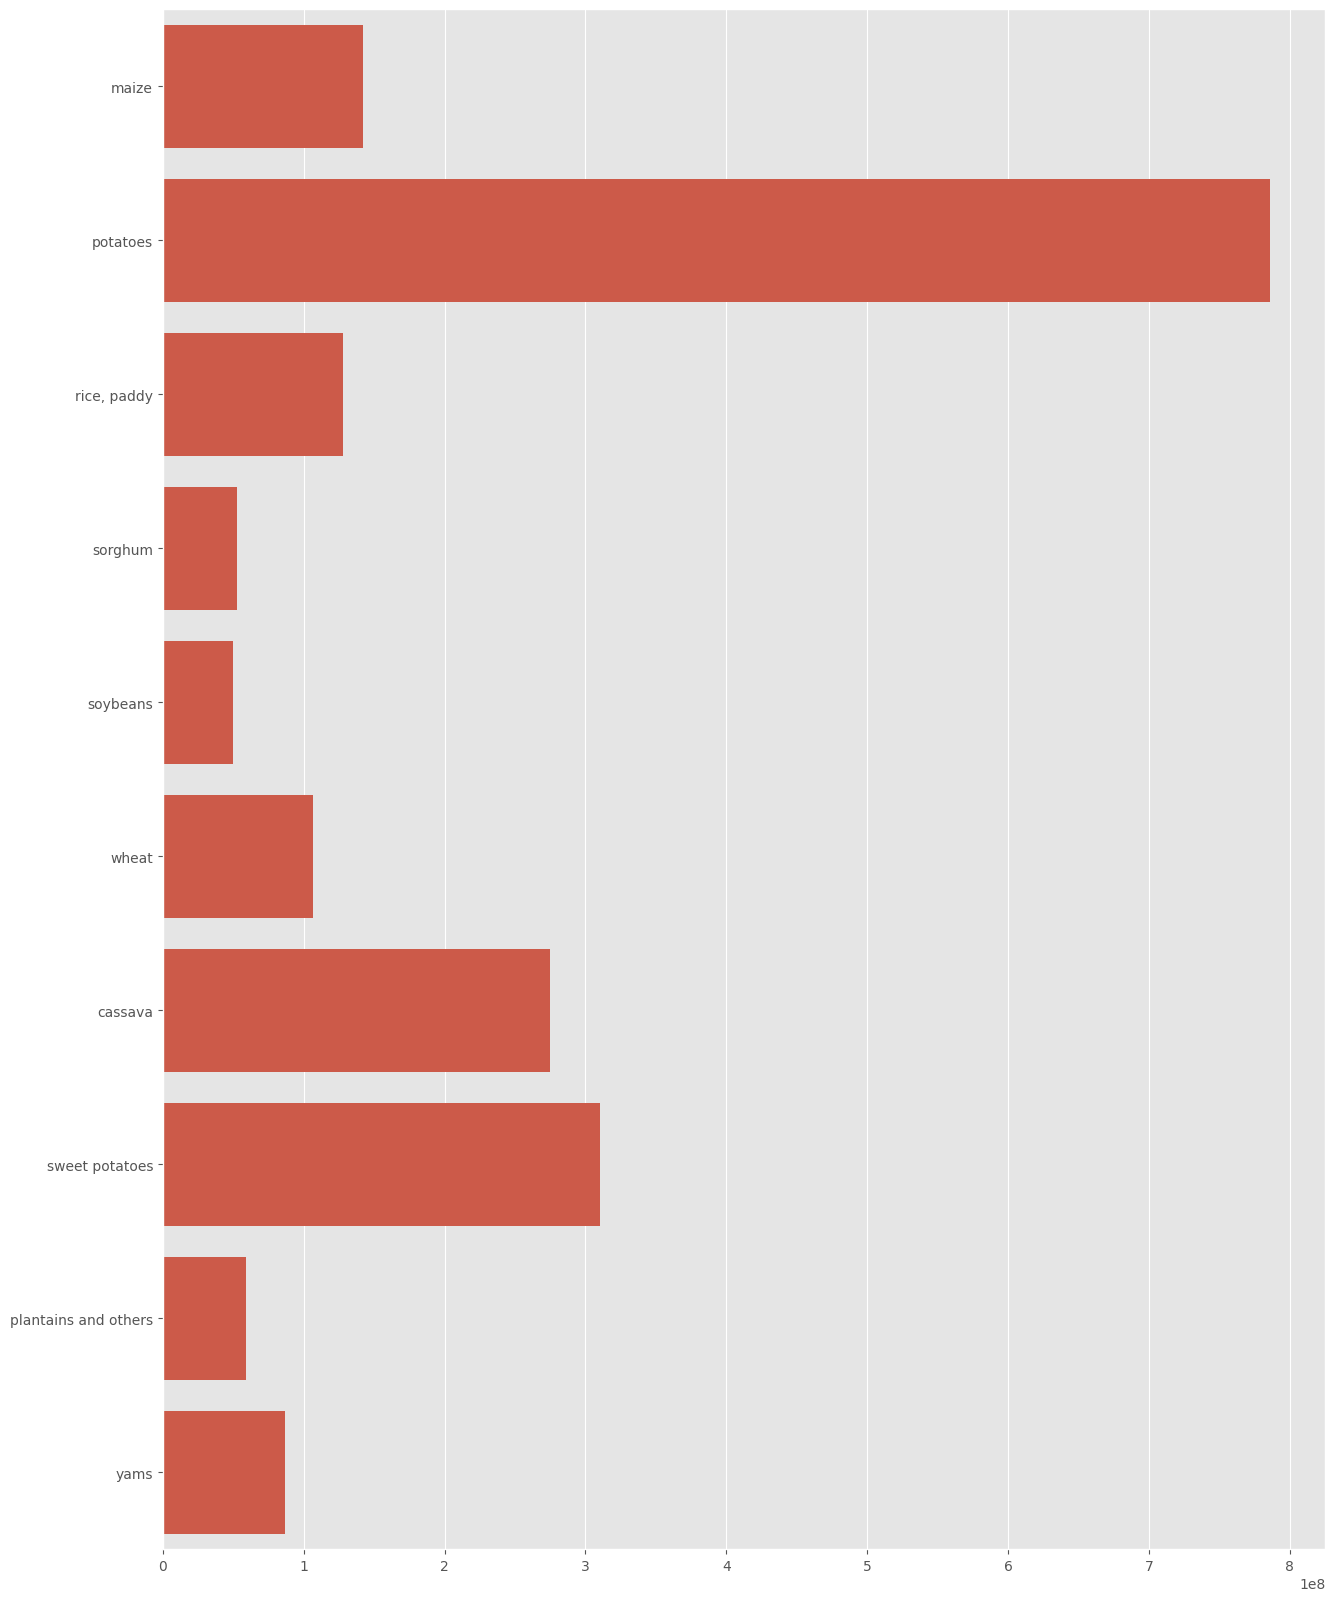

In [75]:
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [76]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,albania,maize,1990,36613,1485.0,121.0,16.37
1,albania,potatoes,1990,66667,1485.0,121.0,16.37
2,albania,"rice, paddy",1990,23333,1485.0,121.0,16.37
3,albania,sorghum,1990,12500,1485.0,121.0,16.37
4,albania,soybeans,1990,7000,1485.0,121.0,16.37


In [77]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [ ]:
df = df[col]

In [80]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,albania,maize,36613
1,1990,1485.0,121.0,16.37,albania,potatoes,66667
2,1990,1485.0,121.0,16.37,albania,"rice, paddy",23333
3,1990,1485.0,121.0,16.37,albania,sorghum,12500
4,1990,1485.0,121.0,16.37,albania,soybeans,7000


In [ ]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [82]:
X.shape

(25932, 6)

In [83]:
y.shape

(25932,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [87]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_algeria', 'OneHotEncode__Area_angola',
       'OneHotEncode__Area_argentina', 'OneHotEncode__Area_armenia',
       'OneHotEncode__Area_australia', 'OneHotEncode__Area_austria',
       'OneHotEncode__Area_azerbaijan', 'OneHotEncode__Area_bahamas',
       'OneHotEncode__Area_bahrain', 'OneHotEncode__Area_bangladesh',
       'OneHotEncode__Area_belarus', 'OneHotEncode__Area_belgium',
       'OneHotEncode__Area_botswana', 'OneHotEncode__Area_brazil',
       'OneHotEncode__Area_bulgaria', 'OneHotEncode__Area_burkina faso',
       'OneHotEncode__Area_burundi', 'OneHotEncode__Area_cameroon',
       'OneHotEncode__Area_canada',
       'OneHotEncode__Area_central african republic',
       'OneHotEncode__Area_chile', 'OneHotEncode__Area_colombia',
       'OneHotEncode__Area_croatia', 'OneHotEncode__Area_denmark',
   

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [89]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

Linear Regression: mae : 29897.28138119728 score : 0.747273256799154


C:\Users\sapta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: mae : 29883.830652070385 score : 0.7472938374682895
Ridge: mae : 29852.895886974235 score : 0.7472627492676969
Decision Tree: mae : 5584.063620589936 score : 0.968491997644135
KNN: mae : 4693.985772122614 score : 0.9845190890556972


In [90]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 23035., 34879., 79048.])

In [91]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [92]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,albania,maize,36613
1,1990,1485.0,121.0,16.37,albania,potatoes,66667
2,1990,1485.0,121.0,16.37,albania,"rice, paddy",23333
3,1990,1485.0,121.0,16.37,albania,sorghum,12500
4,1990,1485.0,121.0,16.37,albania,soybeans,7000


In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    # Convert Area and Item to lowercase
    Area = Area.lower()
    Item = Item.lower()
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [96]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

C:\Users\sapta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sapta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [97]:
result

36613.0

In [ ]:
import pickle
pickle.dump(dtr, open("dtr.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))

In [99]:
import os
print(os.getcwd())  # This will print the current working directory


c:\Users\sapta\Crop-Yield-Prediction-Using-ML
